# NN Moons Dataset Classification

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from multilayer_perceptron import MultiLayerNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
X_train = np.loadtxt("data-moons/x_train.csv")
y_train = np.loadtxt("data-moons/y_train.csv")

In [3]:
y_train = y_train.reshape(1, y_train.shape[0])

In [4]:
print(X_train.shape)
print(y_train.shape)

(2, 300)
(1, 300)


# Binary Neural Net

In [5]:
moons_nn = MultiLayerNN(X = X_train, Y = y_train)

Cost after epoch 0: 0.680541
Learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.130837
Learning rate after epoch 1000: 0.009950
Cost after epoch 2000: 0.127453
Learning rate after epoch 2000: 0.009802
Cost after epoch 3000: 0.123333
Learning rate after epoch 3000: 0.009560
Cost after epoch 4000: 0.121929
Learning rate after epoch 4000: 0.009231
Cost after epoch 5000: 0.123452
Learning rate after epoch 5000: 0.008825
Cost after epoch 6000: 0.121934
Learning rate after epoch 6000: 0.008353
Cost after epoch 7000: 0.122447
Learning rate after epoch 7000: 0.007827
Cost after epoch 8000: 0.124566
Learning rate after epoch 8000: 0.007262
Cost after epoch 9000: 0.122858
Learning rate after epoch 9000: 0.006670
Cost after epoch 10000: 0.122001
Learning rate after epoch 10000: 0.006066
Cost after epoch 11000: 0.121712
Learning rate after epoch 11000: 0.005461
Cost after epoch 12000: 0.121687
Learning rate after epoch 12000: 0.004868
Cost after epoch 13000: 0.122501
Learning rate afte

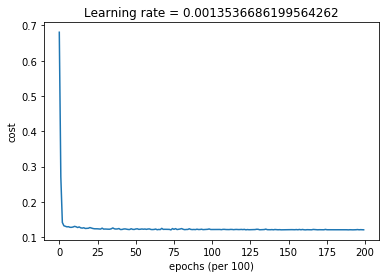

In [6]:
moons_nn.fit_binary(layer_dimensions = [X_train.shape[0], 5, 2, 1],
                    optimizer = "adam",
                    learning_rate = 0.01,
                    learning_decay_rate = 1e-8,
                    num_epochs = 20000)

## Training Set Performance

In [7]:
pred_train = moons_nn.predict_binary(X = X_train, y = y_train)

Accuracy: 0.9466666666666668


In [8]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 0.9466666666666667
Recall: 0.9466666666666667


In [9]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.473333,0.026667
label: 1,0.026667,0.473333
